#### Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.layers import layers_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [3]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [7]:
mps = 1000
camadas = 6

#### Simulation

Filtro criado, 11.59
Filtro criado, 7.03


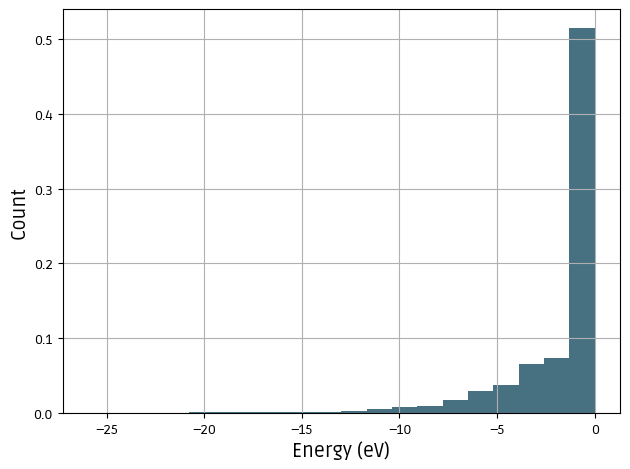

Simulação finalizada, 3.36


In [5]:
filtro = layers_creation(tamanho_rede=1000,porosidade=0.5,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.1,tamanho_cbm=4,display=False)

mps_dic = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False,prob=False)

In [6]:
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

Qtd total MPs 1000, qtd MPs retidos 882
Eficiência: 88.0%


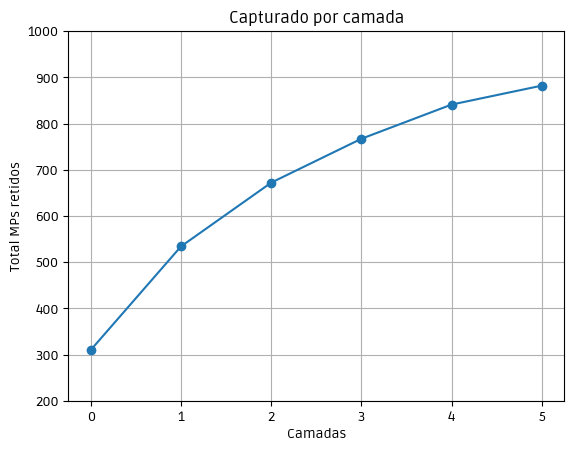

In [8]:
plt.plot(range(camadas),retencao_camada,'-o')

plt.title('Capturado por camada')
plt.xlabel('Camadas')
plt.ylabel('Total MPs retidos')

# plt.axhline(y=0,color='gray',linestyle='--')

plt.ylim(200,1000)
plt.grid()
plt.show()

#### CBM

In [10]:
filtro_c_cbm = layers_creation(tamanho_rede=1000,porosidade=0.5,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.1,tamanho_cbm=4,display=False)

mps_dic_c_cbm = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,tamanho_rede=100,display=False)

Filtro criado, 7.22
Filtro criado, 3.34
Simulação finalizada, 0.35


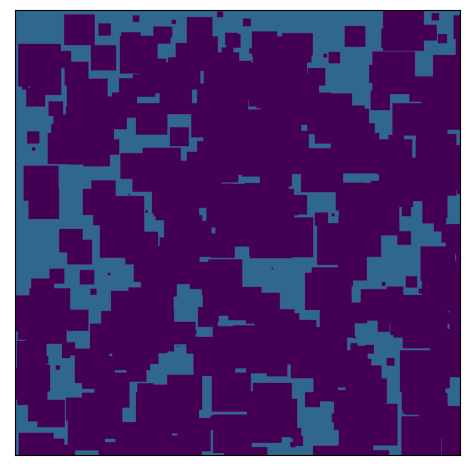

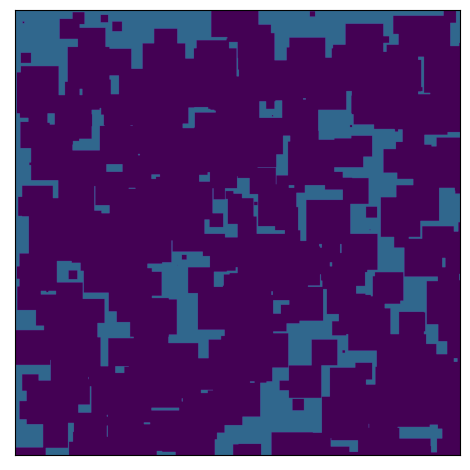

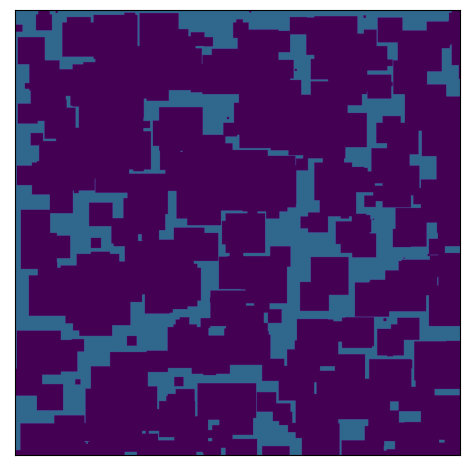

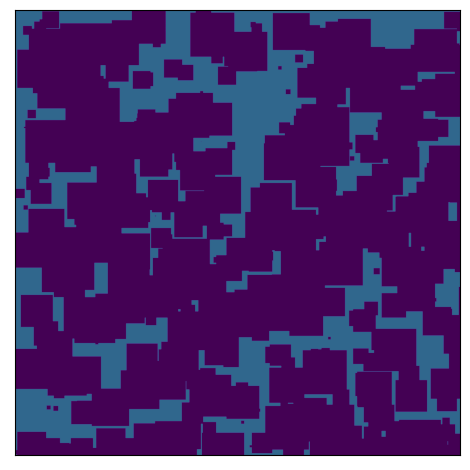

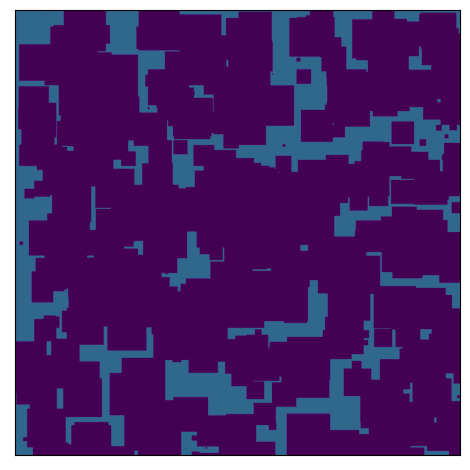

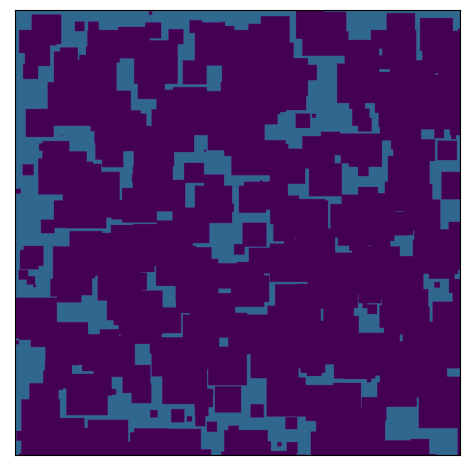

Filtro criado, 12.88
Filtro criado, 4.33


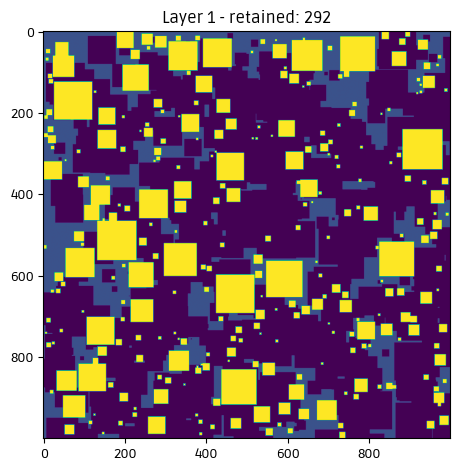

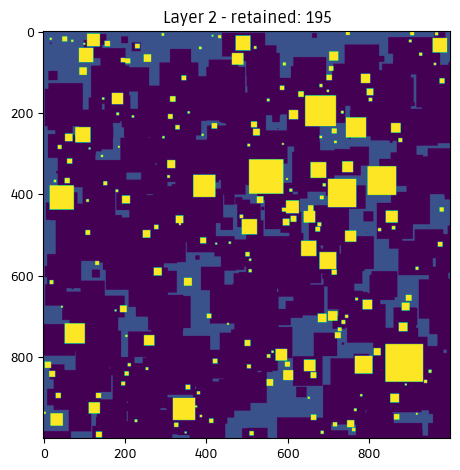

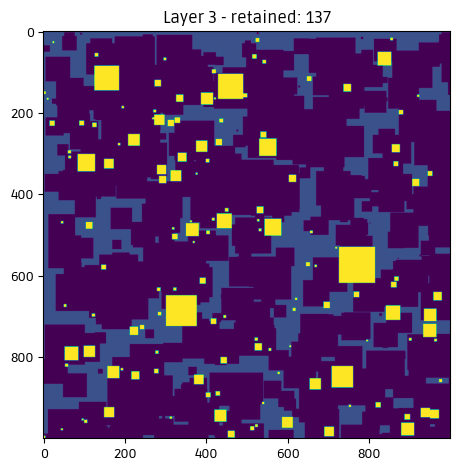

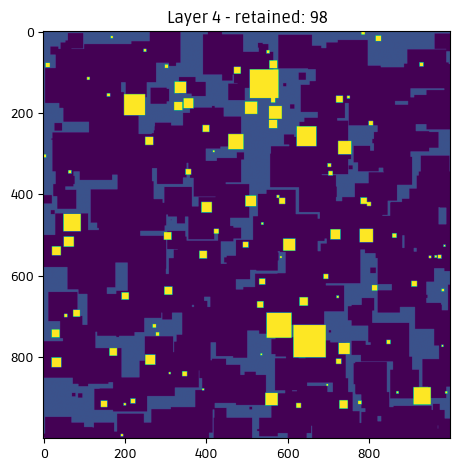

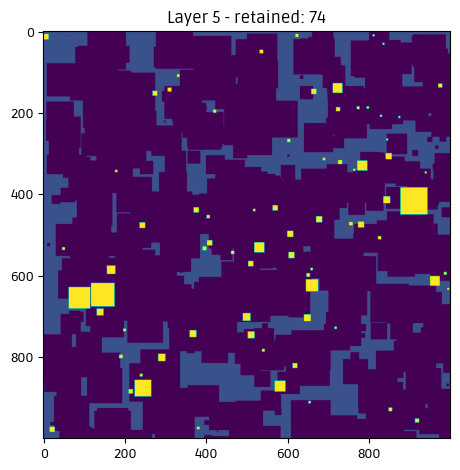

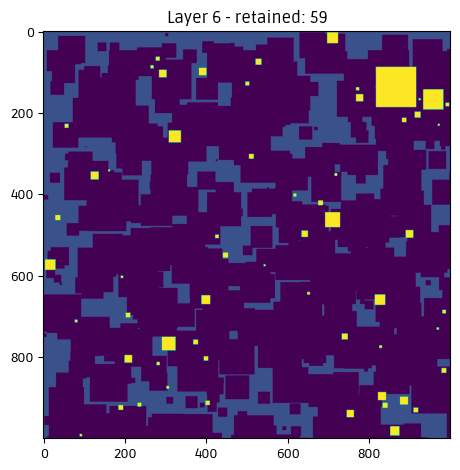

Simulação finalizada, 11.19


In [17]:
filtro_s_cbm = layers_creation(tamanho_rede=1000,porosidade=0.5,
                               camadas=6,limite_tamanho_poro=100,CBM=False,
                               concentracao_cbm=0.1,tamanho_cbm=4,display=True)

mps_dic_s_cbm = mps_creation(qnt_mps = mps,
                             tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,tamanho_rede=100,display=True)

In [18]:
print('Com CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_c_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_c_cbm/mps,2))}%')

print('Sem CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_s_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_s_cbm/mps,2))}%')

Com CBM
Qtd total MPs 1000, qtd MPs retidos 903
Eficiência: 90.0%
Sem CBM
Qtd total MPs 1000, qtd MPs retidos 855
Eficiência: 85.0%


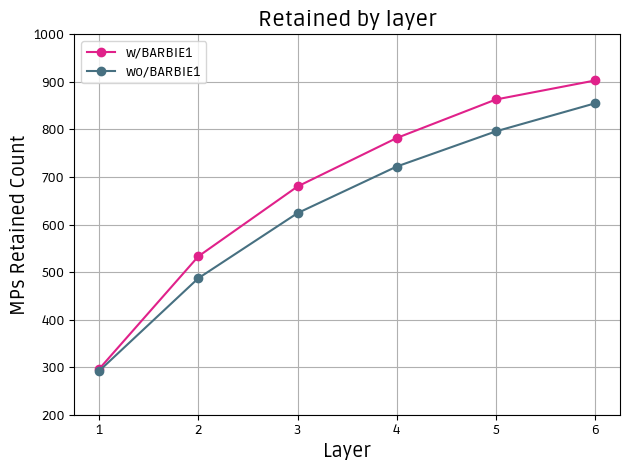

In [23]:
plt.plot(range(1,camadas+1),retencao_camada_c_cbm,'-o',label='w/BARBIE1',color='#E0218A')
plt.plot(range(1,camadas+1),retencao_camada_s_cbm,'-o',label='wo/BARBIE1',color='#477081')

plt.title('Retained by layer',fontsize=16)
plt.xlabel('Layer',fontsize=14)
plt.ylabel('MPs Retained Count',fontsize=14)

# plt.axhline(y=0,color='gray',linestyle='--')

plt.ylim(200,1000)

plt.legend(),plt.grid()
plt.tight_layout()
plt.savefig('results/w_wo.png',dpi=500,transparent=True)

plt.show()

#### Porosidade

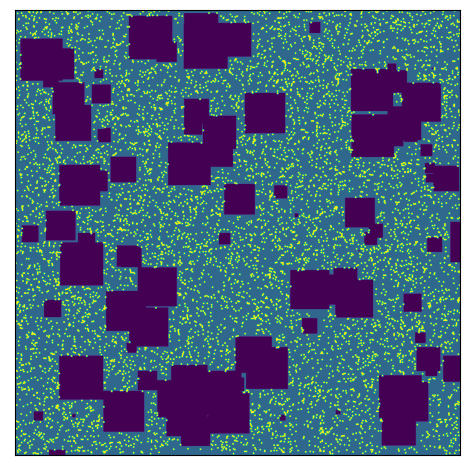

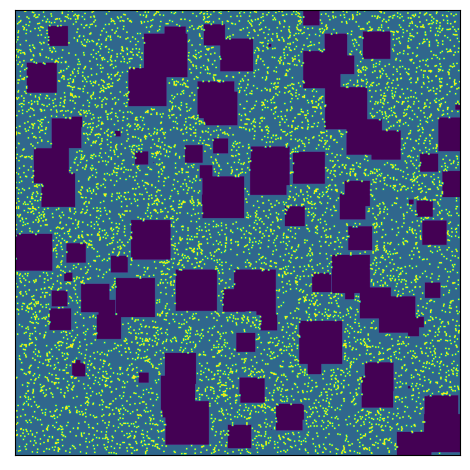

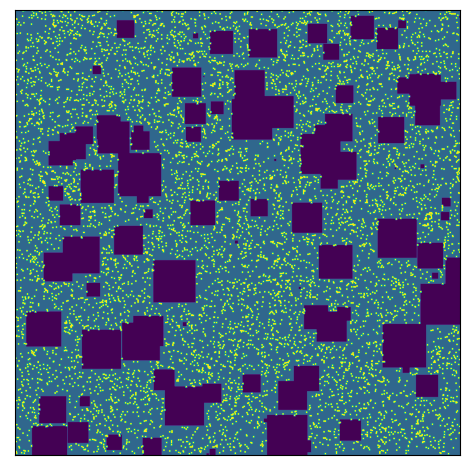

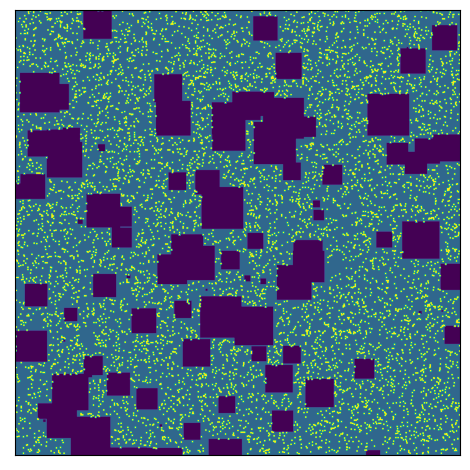

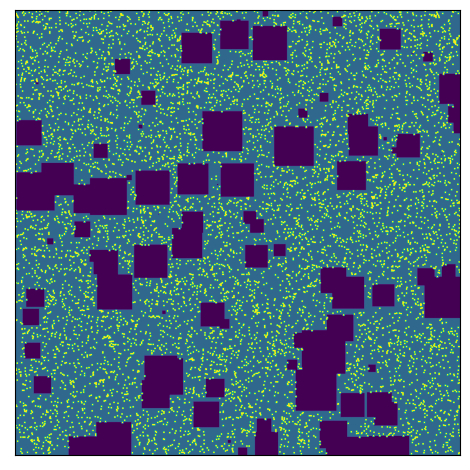

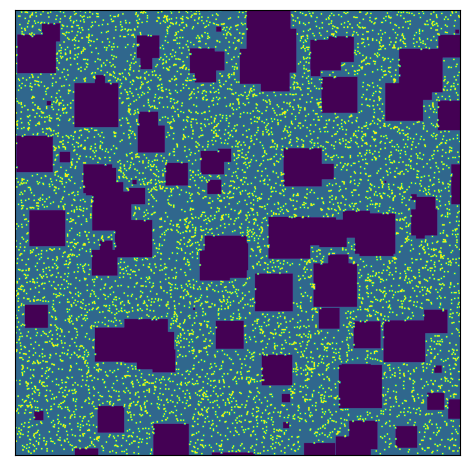

Filtro criado, 12.7
MPs criados, 4.19
Simulação finalizada, 0.34
Porosidade: 0.1
Qtd total MPs 1000, qtd MPs retidos 916
Eficiência: 92.0%


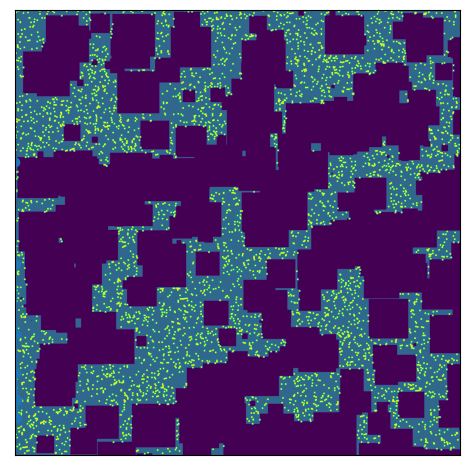

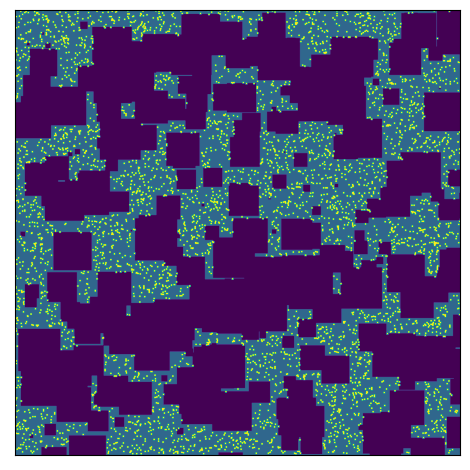

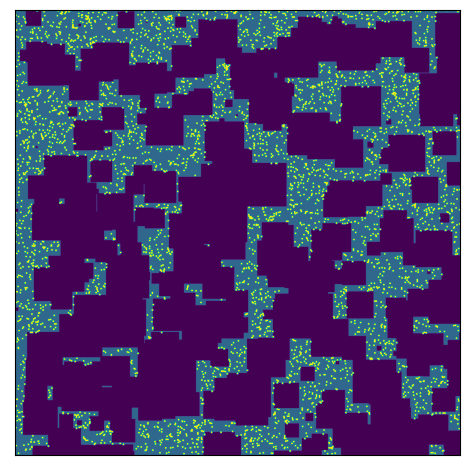

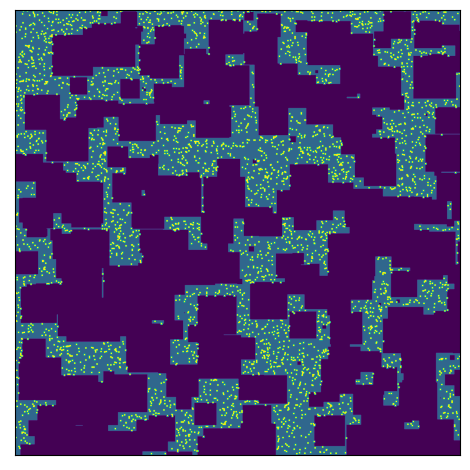

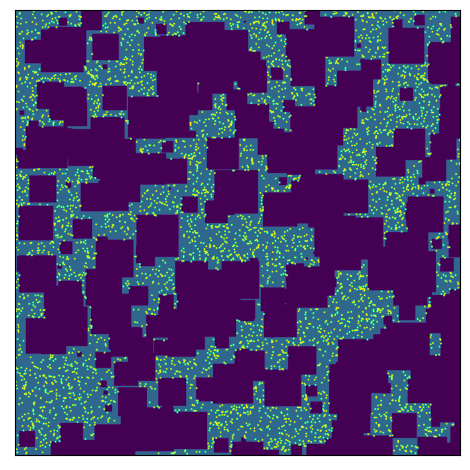

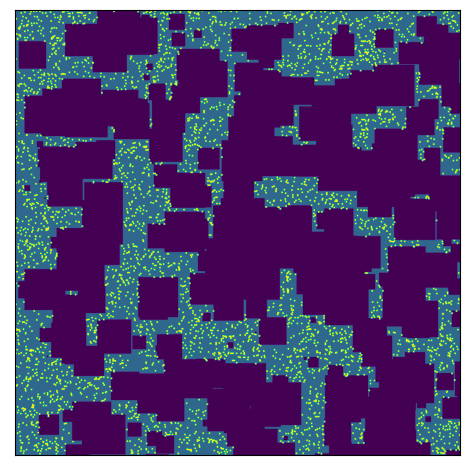

Filtro criado, 14.2
MPs criados, 4.62
Simulação finalizada, 1.08
Porosidade: 0.3
Qtd total MPs 1000, qtd MPs retidos 893
Eficiência: 89.0%


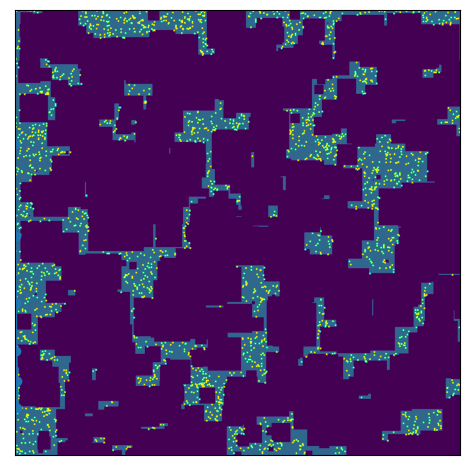

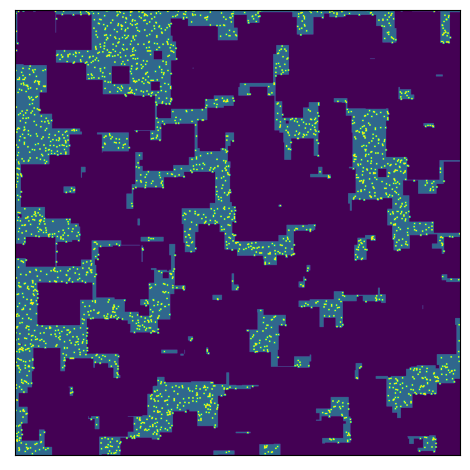

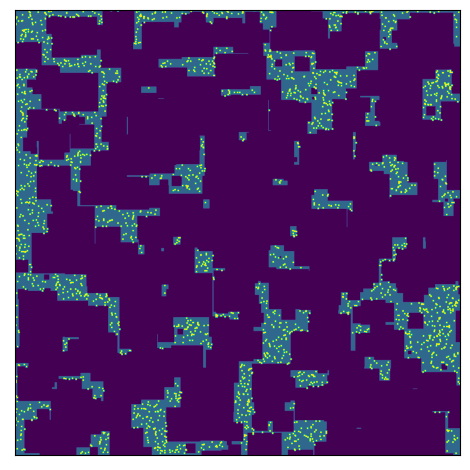

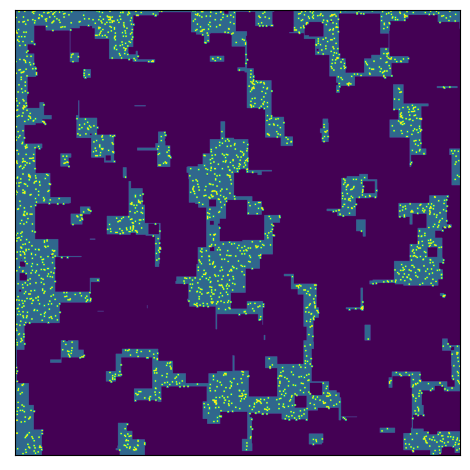

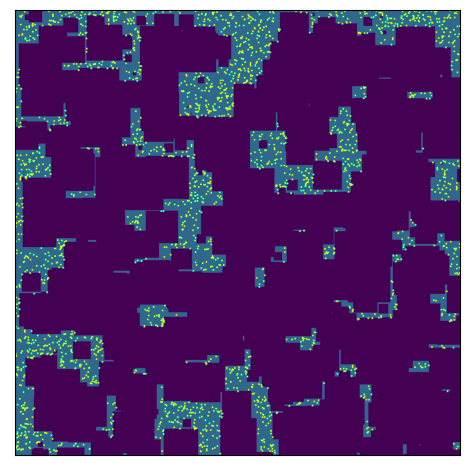

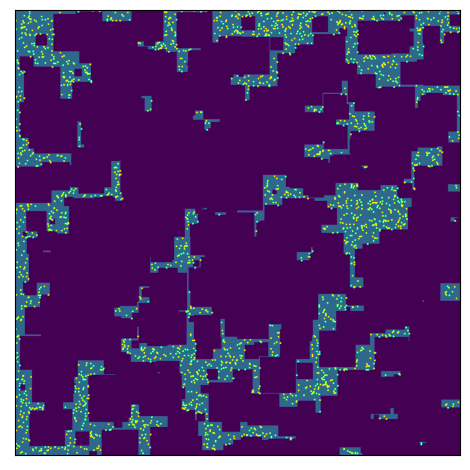

Filtro criado, 35.41
MPs criados, 11.69
Simulação finalizada, 1.28
Porosidade: 0.5
Qtd total MPs 1000, qtd MPs retidos 861
Eficiência: 86.0%


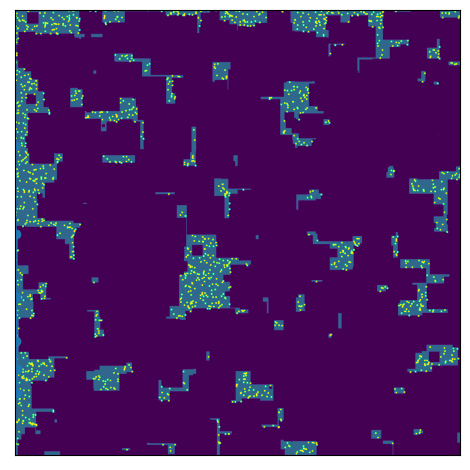

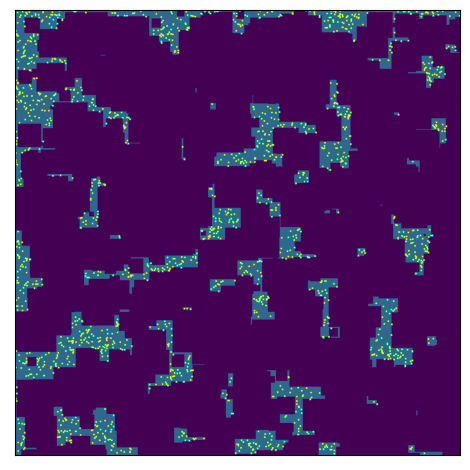

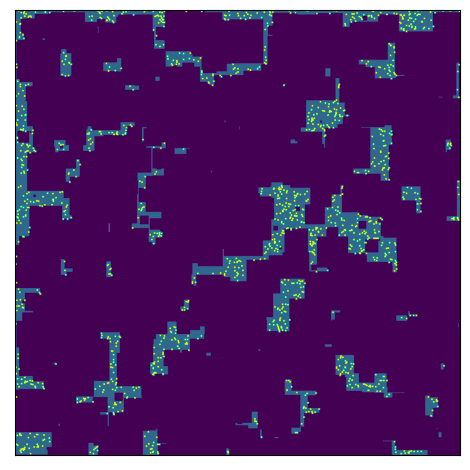

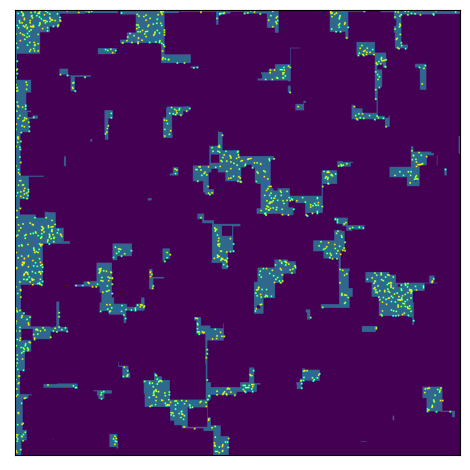

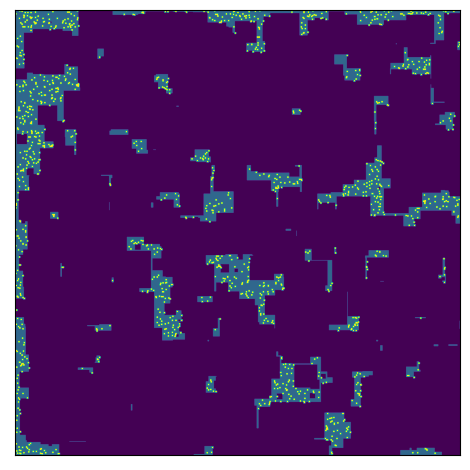

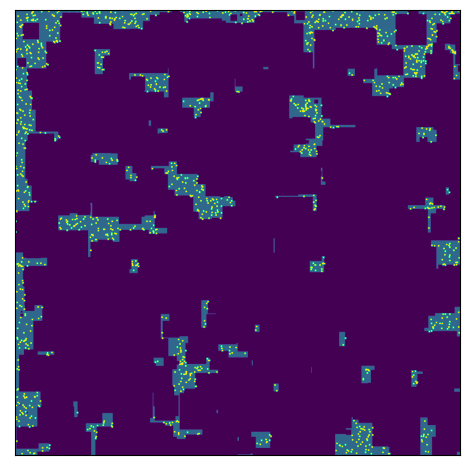

Filtro criado, 40.02
MPs criados, 9.92
Simulação finalizada, 1.3
Porosidade: 0.7
Qtd total MPs 1000, qtd MPs retidos 857
Eficiência: 86.0%


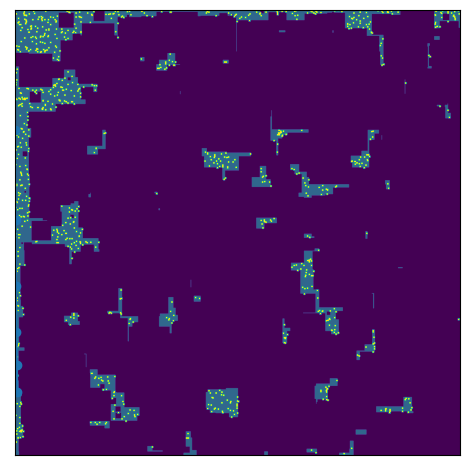

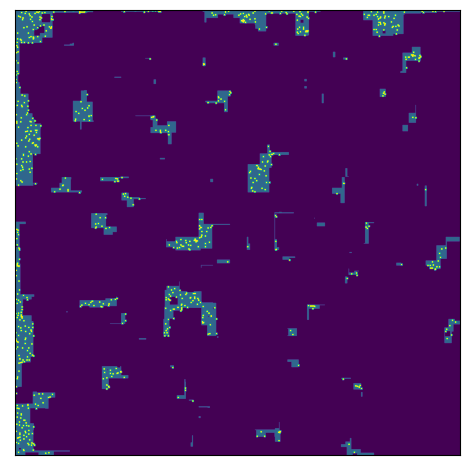

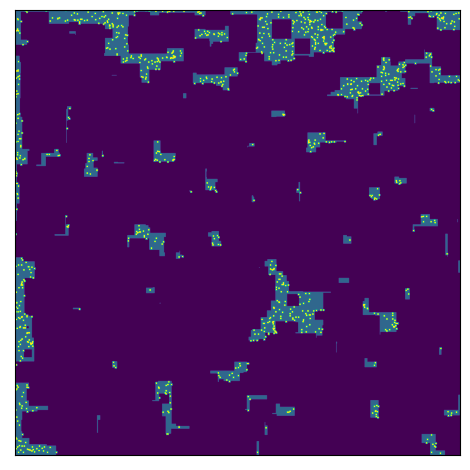

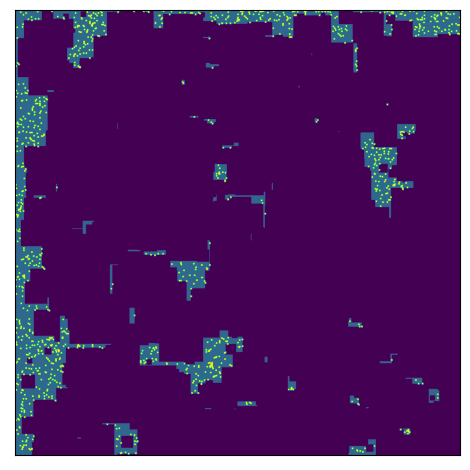

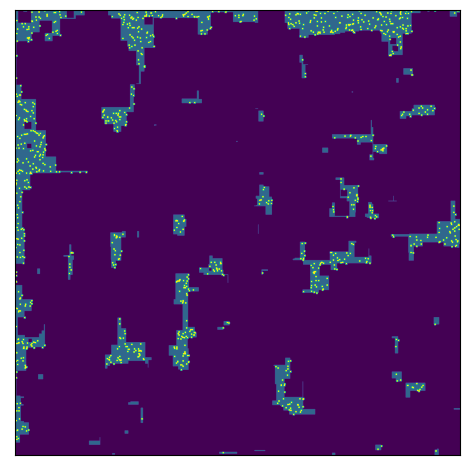

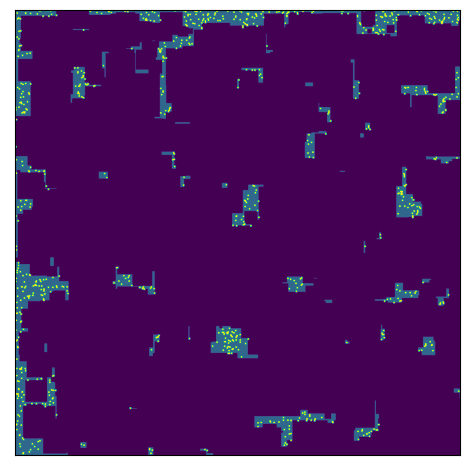

Filtro criado, 42.28
MPs criados, 10.65
Simulação finalizada, 1.35
Porosidade: 0.9
Qtd total MPs 1000, qtd MPs retidos 846
Eficiência: 85.0%


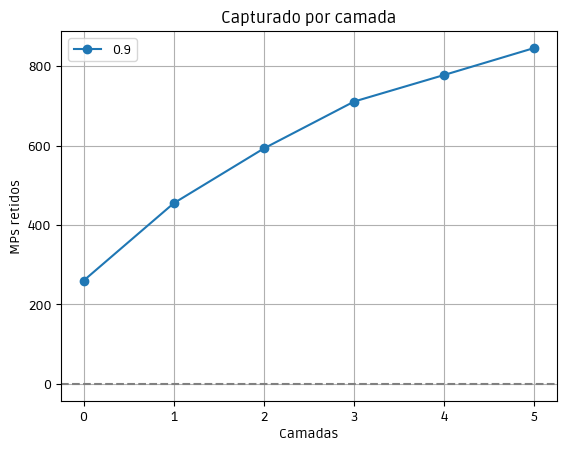

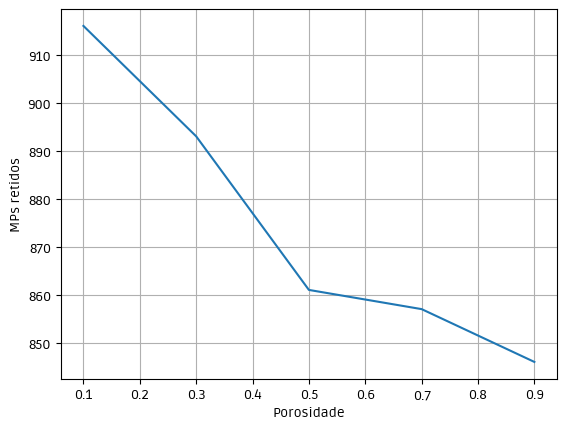

In [8]:
retencao_porosidade = []
porosidades = [0.1,0.3,0.5,0.7,0.9]

for por in porosidades:

    filtro = layers_creation(tamanho_rede=1000,porosidade=por,
                            camadas=6,limite_tamanho_poro=100,CBM=True,
                            concentracao_cbm=0.01,tamanho_cbm=4,display=True)

    mps_dic = mps_creation(qnt_mps = 1000,
                        tamanho_limite_mp = 100,tamanho_rede=1000)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False)

    print(f'Porosidade: {por}')
    print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
    print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

    plt.plot(range(camadas),retencao_camada,'-o',label=por)

    retencao_porosidade.append(mps_retidos)

plt.title('Capturado por camada'),plt.xlabel('Camadas'),plt.ylabel('MPs retidos')
plt.axhline(y=0,color='gray',linestyle='--')
plt.legend(),plt.grid()
plt.show()

plt.plot(porosidades,retencao_porosidade)
plt.xlabel('Porosidade'),plt.ylabel('MPs retidos'),plt.grid()
plt.show()

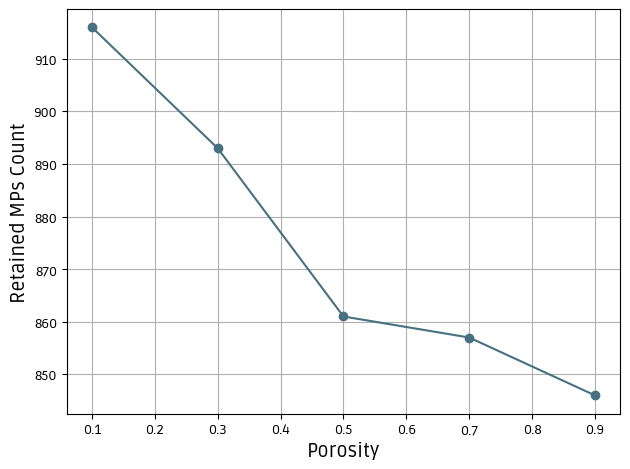

In [21]:
plt.plot(porosidades,retencao_porosidade,'o-',color='#477081')
plt.xlabel('Porosity',fontsize=14),plt.ylabel('Retained MPs Count',fontsize=14),plt.grid()
plt.tight_layout(),plt.savefig('results/porosity.png',transparent=True,dpi=500)
plt.show()